In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("/home/petr/Downloads/embeddings_SPOUT_Rossmann_BertBFD.zip")

df

,Unnamed: 0,label,f0,f1,f2,f3,f4,f5,f6,f7,...,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023
0,246222,1,0.002719,-0.008499,-0.002241,0.000167,0.000487,0.002563,-0.001614,-0.006371,...,0.001495,-0.009048,-0.005730,-0.004997,-0.012758,-0.000195,-0.003062,0.000482,-0.004254,0.000305
1,104797,0,0.006780,0.001744,-0.002460,0.014925,0.027960,-0.001635,-0.014200,0.001674,...,0.001561,-0.044360,-0.003348,-0.003712,0.009559,-0.030452,0.000621,0.001908,0.009812,-0.002015
2,47697,0,0.005448,-0.005838,0.003221,0.001949,0.007222,-0.000213,-0.001627,-0.006893,...,0.004989,-0.012231,-0.007144,-0.003174,-0.007063,-0.001141,-0.005546,-0.005852,-0.003670,-0.001508
3,133782,1,-0.012579,-0.007044,-0.004081,0.005289,0.000986,-0.008543,0.002236,-0.000441,...,0.007080,-0.012013,-0.004591,-0.003904,-0.011737,-0.001742,-0.000780,-0.007650,-0.003186,0.004097
4,7691,0,0.016199,0.007529,-0.008002,0.016695,0.010178,0.011946,0.003704,-0.010590,...,0.010577,-0.042943,-0.018238,0.015288,0.024786,-0.035704,-0.003400,0.007681,-0.021160,0.014269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,134453,1,0.000070,-0.012350,0.005089,-0.001533,0.002385,0.003679,-0.002067,-0.004407,...,0.009282,-0.017805,-0.009491,-0.013416,-0.025329,-0.003264,-0.003002,-0.004721,-0.003111,-0.001599
99996,83090,0,0.000164,0.000735,-0.001011,0.005776,0.003503,0.003073,-0.004881,0.007313,...,0.002156,-0.009077,-0.000384,0.000661,-0.007908,-0.002730,-0.005022,-0.004192,-0.001840,-0.003768
99997,43615,0,0.005599,-0.003891,0.001153,0.004023,0.001094,0.001694,-0.000123,0.003007,...,0.003649,-0.002393,-0.000927,0.003278,0.009297,-0.005597,-0.001591,-0.004453,-0.002443,-0.004239
99998,38492,0,-0.002945,-0.010254,-0.001213,-0.002507,-0.000671,0.007569,0.002840,-0.002751,...,0.001401,-0.008126,-0.002083,-0.000174,0.005126,0.004726,-0.002628,-0.006516,-0.004709,0.009284


In [3]:
df.drop(columns="seq", inplace=True)

import gc
gc.collect()

16

In [4]:
df = df.sample(frac=1)

gc.collect()

16

In [6]:
df.to_csv("/home/petr/Downloads/tmp.csv")

In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["label"], inplace=False))

In [4]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PCA1', 'PCA2'])
df_pca

,PCA1,PCA2
0,-7.183228,-0.280778
1,38.949351,-13.974328
2,-5.601661,0.473218
3,-5.806907,-6.185018
4,45.476402,-8.874591
...,...,...
99995,-5.535642,-10.934178
99996,0.187745,6.752773
99997,-4.314893,4.880236
99998,-1.254108,1.664049


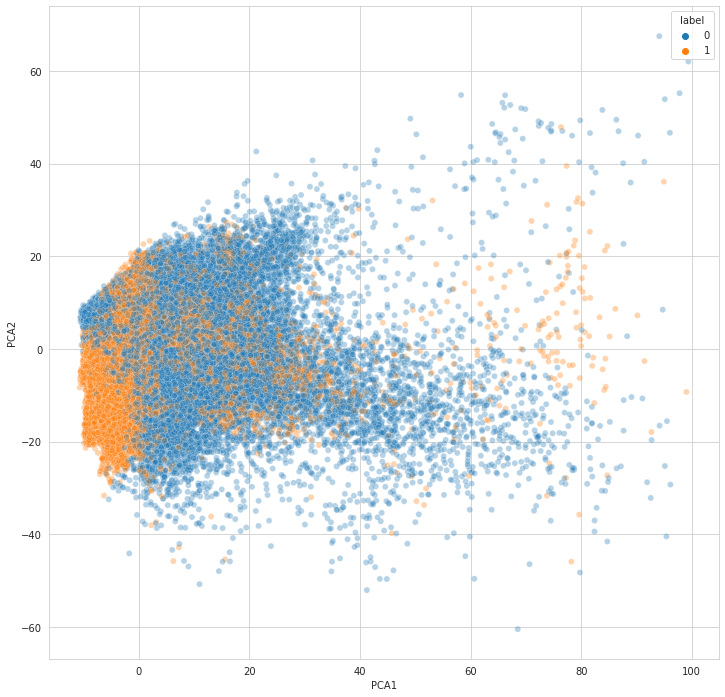

In [7]:
plt.figure(figsize=(12, 12))

sns.scatterplot(x=df_pca.PCA1, y=df_pca.PCA2, hue=df.label, alpha=0.33);

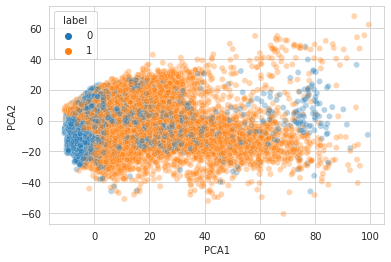

In [9]:
sns.scatterplot(x=df_pca.PCA1[::-1], y=df_pca.PCA2[::-1], hue=-df.label[::-1]+1, alpha=0.33);